<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
import numpy as np


def sum_prod(X, V):
    '''
    X - список из p матриц размерности (n, n)
    V - список из p векторов размерности (n, 1)
    Возвращает: сумму произведений матриц на векторы (n, 1)
    '''
    if len(X) == 0:  # Обработка случая пустого ввода
        return np.array([])
    
    # Инициализация результата с правильным типом данных (float)
    result = np.zeros_like(V[0], dtype=np.float64)
    for matrix, vector in zip(X, V):
        result += matrix @ vector  # Умножение матрицы на вектор и накопление суммы
    return result

# Тесты для функции
def test_sum_prod():
    print("Запуск тестов...")
    
    # Тест №1: Простой случай 2x2
    X1 = [np.array([[1, 2], [3, 4]], dtype=np.float64), 
          np.array([[5, 6], [7, 8]], dtype=np.float64)]
    V1 = [np.array([[1], [0]], dtype=np.float64), 
          np.array([[0], [1]], dtype=np.float64)]
    expected1 = np.array([[7], [11]], dtype=np.float64)
    assert np.allclose(sum_prod(X1, V1), expected1), "Тест 1 не пройден"
    
    # Тест №2: Одна матрица и один вектор
    X2 = [np.array([[2, 0], [0, 2]], dtype=np.float64)]
    V2 = [np.array([[1], [1]], dtype=np.float64)]
    expected2 = np.array([[2], [2]], dtype=np.float64)
    assert np.allclose(sum_prod(X2, V2), expected2), "Тест 2 не пройден"
    
    # Тест №3: Случай 3x3
    X3 = [np.eye(3, dtype=np.float64), 
          np.ones((3, 3), dtype=np.float64)]
    V3 = [np.array([[1], [2], [3]], dtype=np.float64), 
          np.array([[1], [1], [1]], dtype=np.float64)]
    expected3 = np.array([[4], [5], [6]], dtype=np.float64)
    assert np.allclose(sum_prod(X3, V3), expected3), "Тест 3 не пройден"
    
    # Тест №4: Пустой ввод
    X4 = []
    V4 = []
    assert sum_prod(X4, V4).size == 0, "Тест 4 не пройден"
    
    print("Все тесты успешно пройдены!")

# Запуск тестов
test_sum_prod()

Запуск тестов...
Все тесты успешно пройдены!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
import numpy as np


def binarize(M, threshold=0.5):
    '''
    Бинаризует матрицу по заданному порогу
    
    Параметры:
    M - входная матрица (numpy array)
    threshold - пороговое значение (по умолчанию 0.5)
    
    Возвращает:
    Бинаризованную матрицу той же формы, где:
      - 1, если значение >= threshold
      - 0, если значение < threshold
    '''
    return (M >= threshold).astype(np.int8)

# Тесты для функции binarize
def test_binarize():
    print("Запуск тестов для функции binarize...")
    
    # Тест 1: Простая матрица 2x2
    M1 = np.array([[0.4, 0.6], [0.2, 0.8]])
    expected1 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(binarize(M1), expected1), "Тест 1 не пройден"
    
    # Тест 2: Пользовательский порог
    M2 = np.array([[0.3, 0.7], [0.5, 0.9]])
    expected2 = np.array([[0, 1], [1, 1]])
    assert np.array_equal(binarize(M2, threshold=0.5), expected2), "Тест 2 не пройден"
    expected2_low = np.array([[1, 1], [1, 1]])
    assert np.array_equal(binarize(M2, threshold=0.2), expected2_low), "Тест 2.1 не пройден"
    
    # Тест 3: Граничные значения
    M3 = np.array([[0.499999, 0.5], [0.500001, 1.0]])
    expected3 = np.array([[0, 1], [1, 1]])
    assert np.array_equal(binarize(M3), expected3), "Тест 3 не пройден"
    
    # Тест 4: Целочисленная матрица
    M4 = np.array([[1, 2], [3, 4]])
    expected4 = np.array([[0, 0], [1, 1]])
    assert np.array_equal(binarize(M4, threshold=2.5), expected4), "Тест 4 не пройден"
    
    # Тест 5: Все значения выше порога
    M5 = np.array([[0.6, 0.7], [0.8, 0.9]])
    expected5 = np.array([[1, 1], [1, 1]])
    assert np.array_equal(binarize(M5), expected5), "Тест 5 не пройден"
    
    # Тест 6: Все значения ниже порога
    M6 = np.array([[0.1, 0.2], [0.3, 0.4]])
    expected6 = np.array([[0, 0], [0, 0]])
    assert np.array_equal(binarize(M6), expected6), "Тест 6 не пройден"
    
    print("Все тесты для функции binarize успешно пройдены!")

# Запуск тестов
test_binarize()

Запуск тестов для функции binarize...
Все тесты для функции binarize успешно пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [ ]:
import numpy as np


def unique_rows(mat):
    '''
    Возвращает уникальные элементы для каждой строки матрицы
    '''
    if isinstance(mat, list):
        mat = np.array(mat)
    if mat.size == 0:
        return []
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    '''
    Возвращает уникальные элементы для каждого столбца матрицы
    '''
    if isinstance(mat, list):
        mat = np.array(mat)
    if mat.size == 0:
        return []
    return [np.unique(col) for col in mat.T]

def test_unique_functions():
    print("Запуск тестов для функций unique_rows и unique_columns...")
    
    # Тестовая матрица
    test_mat = np.array([
        [1, 2, 3],
        [4, 5, 5],
        [1, 1, 2],
        [4, 4, 4]
    ])
    
    # Тесты для unique_rows
    row_result = unique_rows(test_mat)
    expected_rows = [
        np.array([1, 2, 3]),
        np.array([4, 5]),
        np.array([1, 2]),
        np.array([4])
    ]
    for i, (res, exp) in enumerate(zip(row_result, expected_rows)):
        assert np.array_equal(res, exp), f"Тест unique_rows строка {i} не пройден"
    
    # Тесты для unique_columns (исправленные ожидаемые значения)
    col_result = unique_columns(test_mat)
    expected_cols = [
        np.array([1, 4]),
        np.array([1, 2, 4, 5]),  # Исправлено!
        np.array([2, 3, 4, 5])
    ]
    for i, (res, exp) in enumerate(zip(col_result, expected_cols)):
        assert np.array_equal(res, exp), f"Тест unique_columns столбец {i} не пройден"
    
    # Дополнительные тесты
    empty_mat = np.array([])
    assert unique_rows(empty_mat) == [], "Тест empty для unique_rows не пройден"
    assert unique_columns(empty_mat) == [], "Тест empty для unique_columns не пройден"
    
    single_row = np.array([[1, 2, 1, 2]])
    assert np.array_equal(unique_rows(single_row)[0], np.array([1, 2])), "Тест single row не пройден"
    assert len(unique_columns(single_row)) == 4, "Тест single row columns не пройден"
    
    print("Все тесты для unique_rows и unique_columns успешно пройдены!")

test_unique_functions()

Запуск тестов для функций unique_rows и unique_columns...
Все тесты для unique_rows и unique_columns успешно пройдены!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


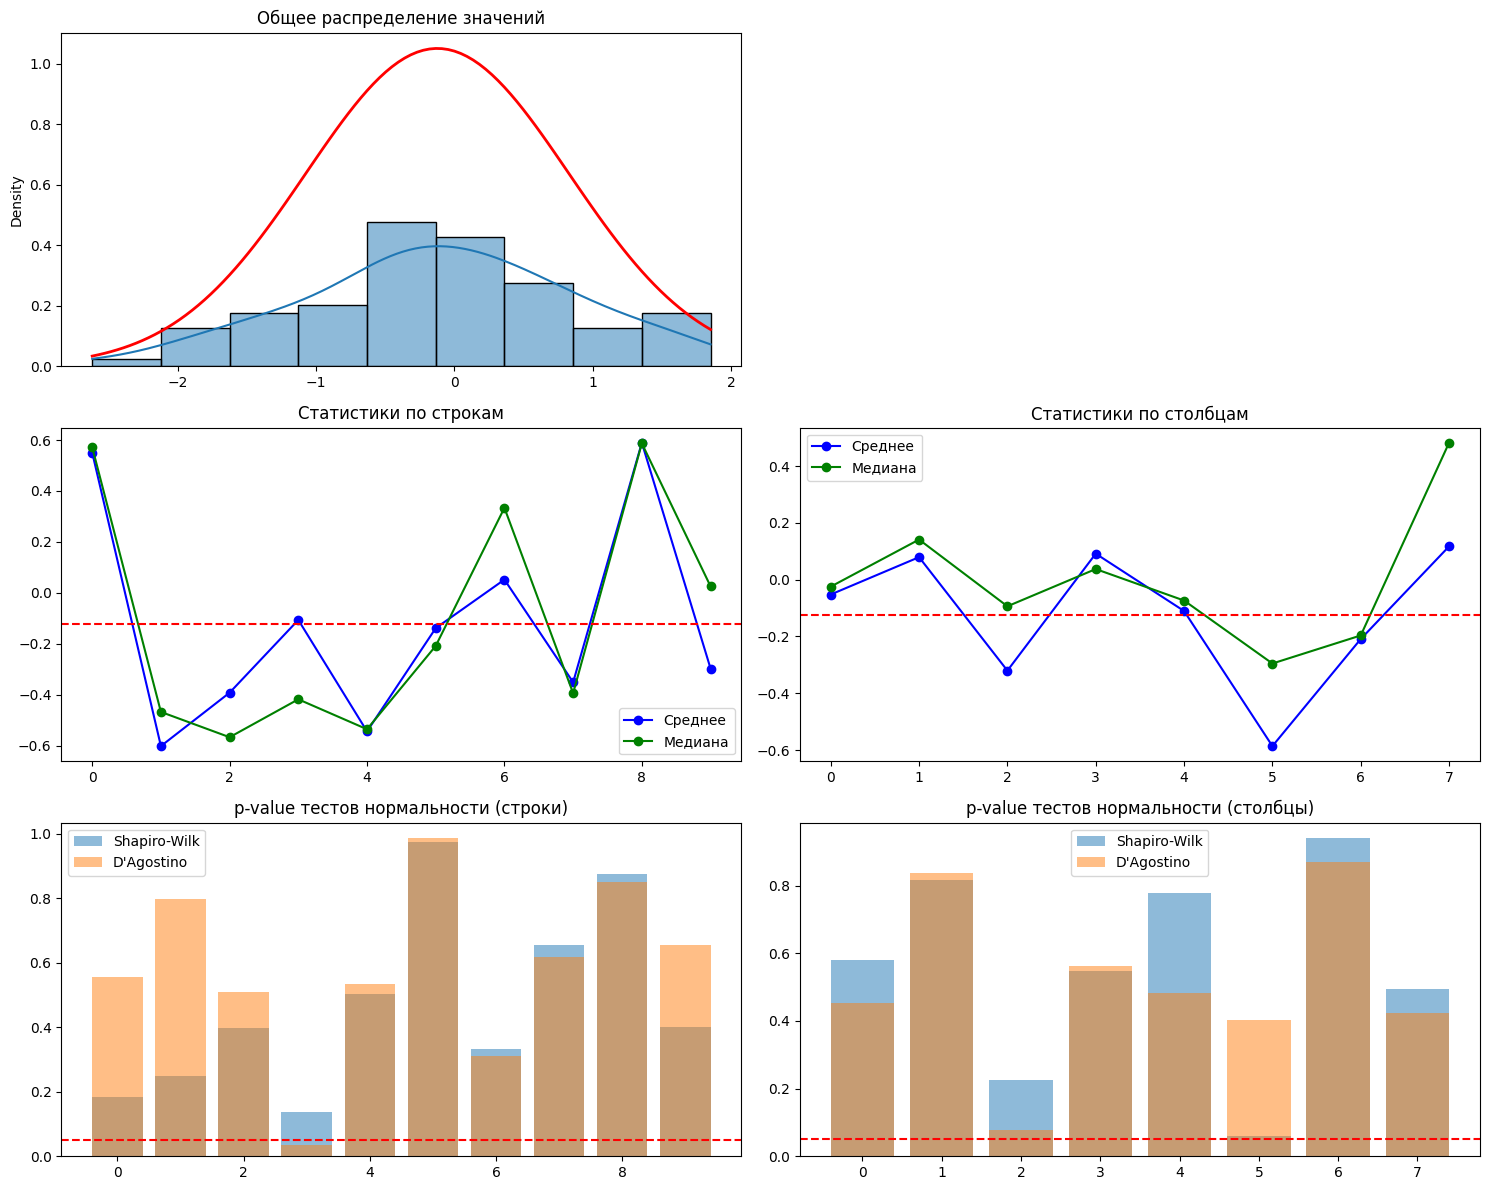

Глобальные статистики:
Среднее: -0.1238
Медиана: -0.1270
Дисперсия: 0.9053
Стандартное отклонение: 0.9515


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
import seaborn as sns

def analyze_normal_matrix(m, n, mu=0, sigma=1, random_seed=None, show_plots=True):
    """
    Улучшенная функция для генерации и анализа матрицы с нормальным распределением
    
    Параметры:
    m, n - размеры матрицы (строки, столбцы)
    mu - среднее нормального распределения
    sigma - стандартное отклонение
    random_seed - seed для воспроизводимости
    show_plots - отображать графики
    
    Возвращает:
    Словарь с полной статистикой и тестами
    """
    # Настройка воспроизводимости
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Генерация матрицы
    matrix = np.random.normal(loc=mu, scale=sigma, size=(m, n))
    
    # Вычисление статистик
    stats = {
        'matrix': matrix,
        'row_stats': {
            'means': np.mean(matrix, axis=1),
            'medians': np.median(matrix, axis=1),
            'vars': np.var(matrix, axis=1),
            'stds': np.std(matrix, axis=1),
            'shapiro_p': [shapiro(row)[1] for row in matrix],
            'normaltest_p': [normaltest(row)[1] for row in matrix]
        },
        'col_stats': {
            'means': np.mean(matrix, axis=0),
            'medians': np.median(matrix, axis=0),
            'vars': np.var(matrix, axis=0),
            'stds': np.std(matrix, axis=0),
            'shapiro_p': [shapiro(col)[1] for col in matrix.T],
            'normaltest_p': [normaltest(col)[1] for col in matrix.T]
        },
        'global_stats': {
            'mean': np.mean(matrix),
            'median': np.median(matrix),
            'var': np.var(matrix),
            'std': np.std(matrix)
        }
    }
    
    # Визуализация
    if show_plots:
        plot_results(matrix, stats, m, n)
    
    return stats

def plot_results(matrix, stats, m, n):
    """Функция для визуализации результатов"""
    plt.figure(figsize=(15, 12))
    
    # 1. Распределения значений
    plt.subplot(3, 2, 1)
    sns.histplot(matrix.flatten(), kde=True, stat='density')
    x = np.linspace(matrix.min(), matrix.max(), 100)
    plt.plot(x, stats['global_stats']['std']**-1 * 
             np.exp(-0.5*((x-stats['global_stats']['mean'])/stats['global_stats']['std'])**2),
             'r-', lw=2)
    plt.title('Общее распределение значений')
    
    # 2. Статистики по строкам
    plt.subplot(3, 2, 3)
    plt.plot(stats['row_stats']['means'], 'bo-', label='Среднее')
    plt.plot(stats['row_stats']['medians'], 'go-', label='Медиана')
    plt.axhline(y=stats['global_stats']['mean'], color='r', linestyle='--')
    plt.title('Статистики по строкам')
    plt.legend()
    
    # 3. Статистики по столбцам
    plt.subplot(3, 2, 4)
    plt.plot(stats['col_stats']['means'], 'bo-', label='Среднее')
    plt.plot(stats['col_stats']['medians'], 'go-', label='Медиана')
    plt.axhline(y=stats['global_stats']['mean'], color='r', linestyle='--')
    plt.title('Статистики по столбцам')
    plt.legend()
    
    # 4. Тесты нормальности для строк
    plt.subplot(3, 2, 5)
    plt.bar(range(m), stats['row_stats']['shapiro_p'], alpha=0.5, label='Shapiro-Wilk')
    plt.bar(range(m), stats['row_stats']['normaltest_p'], alpha=0.5, label='D\'Agostino')
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.title('p-value тестов нормальности (строки)')
    plt.legend()
    
    # 5. Тесты нормальности для столбцов
    plt.subplot(3, 2, 6)
    plt.bar(range(n), stats['col_stats']['shapiro_p'], alpha=0.5, label='Shapiro-Wilk')
    plt.bar(range(n), stats['col_stats']['normaltest_p'], alpha=0.5, label='D\'Agostino')
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.title('p-value тестов нормальности (столбцы)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Пример использования
results = analyze_normal_matrix(
    m=10, 
    n=8,
    mu=0,
    sigma=1,
    random_seed=42,
    show_plots=True
)

# Вывод статистик
print("Глобальные статистики:")
print(f"Среднее: {results['global_stats']['mean']:.4f}")
print(f"Медиана: {results['global_stats']['median']:.4f}")
print(f"Дисперсия: {results['global_stats']['var']:.4f}")
print(f"Стандартное отклонение: {results['global_stats']['std']:.4f}")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
import numpy as np


def chess(m, n, a, b):
    """
    Создает матрицу m x n, заполненную в шахматном порядке числами a и b
    
    Параметры:
    m - количество строк
    n - количество столбцов
    a - первое число
    b - второе число
    
    Возвращает:
    Матрицу NumPy в шахматном порядке
    """
    # Создаем матрицу, заполненную числом a
    mat = np.full((m, n), a)
    
    # Заполняем каждый второй элемент числом b, начиная с первого элемента
    mat[::2, ::2] = b  # Четные строки, четные столбцы
    mat[1::2, 1::2] = b  # Нечетные строки, нечетные столбцы
    
    return mat

def test_chess():
    print("Тестирование функции chess()...")
    
    # Тест 1: Матрица 2x2
    expected1 = np.array([[1, 0],
                         [0, 1]])
    assert np.array_equal(chess(2, 2, 0, 1), expected1), "Тест 1 не пройден"
    
    # Тест 2: Матрица 3x3
    expected2 = np.array([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
    assert np.array_equal(chess(3, 3, 0, 1), expected2), "Тест 2 не пройден"
    
    # Тест 3: Матрица 3x4 с разными числами
    expected3 = np.array([[5, 2, 5, 2],
                         [2, 5, 2, 5],
                         [5, 2, 5, 2]])
    assert np.array_equal(chess(3, 4, 2, 5), expected3), "Тест 3 не пройден"
    
    # Тест 4: Матрица 1x1
    expected4 = np.array([[7]])
    assert np.array_equal(chess(1, 1, 7, 7), expected4), "Тест 4 не пройден"
    
    # Тест 5: Матрица 4x1
    expected5 = np.array([[1], [0], [1], [0]])
    assert np.array_equal(chess(4, 1, 0, 1), expected5), "Тест 5 не пройден"
    
    print("Все тесты успешно пройдены!")

# Демонстрация работы функции
if __name__ == "__main__":
    test_chess()
    
    # Примеры использования
    print("\nПример матрицы 4x4:")
    print(chess(4, 4, 0, 1))
    
    print("\nПример матрицы 5x3 с числами 3 и 7:")
    print(chess(5, 3, 3, 7))

Тестирование функции chess()...
Все тесты успешно пройдены!

Пример матрицы 4x4:
[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]

Пример матрицы 5x3 с числами 3 и 7:
[[7 3 7]
 [3 7 3]
 [7 3 7]
 [3 7 3]
 [7 3 7]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Тестирование функций рисования фигур...
Все тесты пройдены успешно!


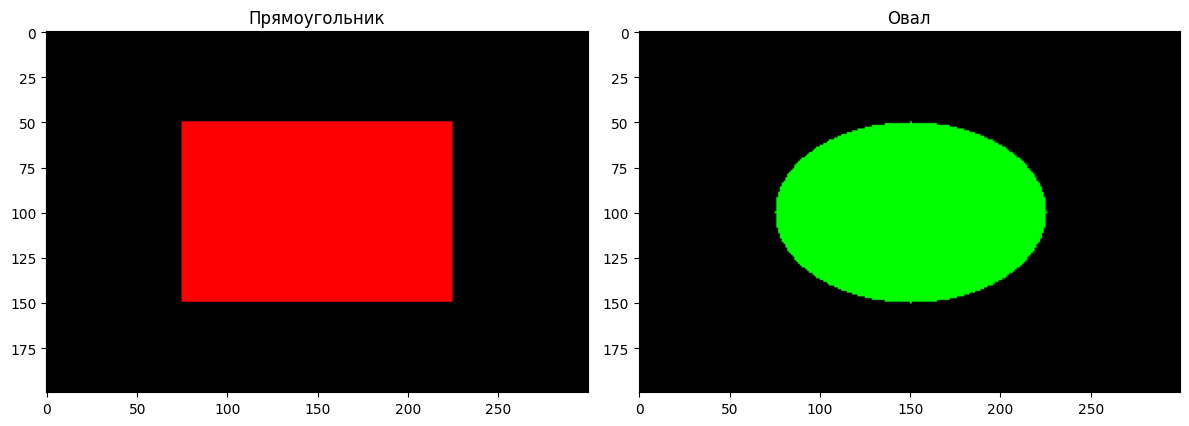

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Создает изображение с прямоугольником заданных размеров и цветов

    Параметры:
        a, b - ширина и высота прямоугольника
        m, n - размеры изображения (высота, ширина)
        rectangle_color - цвет прямоугольника в формате (R, G, B) [0-255]
        background_color - цвет фона в формате (R, G, B) [0-255]

    Возвращает:
        Массив numpy формы (m, n, 3) с изображением
    """
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color

    x_start = (n - b) // 2
    y_start = (m - a) // 2
    x_end = x_start + b
    y_end = y_start + a

    x_start = max(0, x_start)
    y_start = max(0, y_start)
    x_end = min(n, x_end)
    y_end = min(m, y_end)

    image[y_start:y_end, x_start:x_end] = rectangle_color

    return image


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    """
    Создает изображение с овалом заданных размеров и цветов

    Параметры:
        a, b - полуоси овала (по вертикали и горизонтали)
        m, n - размеры изображения (высота, ширина)
        ellipse_color - цвет овала в формате (R, G, B) [0-255]
        background_color - цвет фона в формате (R, G, B) [0-255]

    Возвращает:
        Массив numpy формы (m, n, 3) с изображением
    """
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color

    x0, y0 = n // 2, m // 2

    y, x = np.ogrid[:m, :n]

    ellipse_mask = ((x - x0) ** 2 / b ** 2 + (y - y0) ** 2 / a ** 2) <= 1

    image[ellipse_mask] = ellipse_color

    return image


def test_shapes():
    """Тестирование функций рисования фигур"""
    print("Тестирование функций рисования фигур...")

    rect = draw_rectangle(100, 150, 200, 300, (255, 0, 0), (0, 0, 0))
    assert rect.shape == (200, 300, 3), "Неверный размер изображения с прямоугольником"
    assert np.all(rect[50:150, 75:225] == (255, 0, 0)), "Прямоугольник нарисован неверно"

    ellipse = draw_ellipse(50, 75, 200, 300, (0, 255, 0), (0, 0, 0))
    assert ellipse.shape == (200, 300, 3), "Неверный размер изображения с овалом"
    assert np.all(ellipse[100, 150] == (0, 255, 0)), "Центр овала не соответствует цвету"

    big_rect = draw_rectangle(300, 400, 200, 300, (0, 0, 255), (255, 255, 255))
    assert np.all(big_rect == (0, 0, 255)), "Большой прямоугольник не заполнил все изображение"

    print("Все тесты пройдены успешно!")


def visualize_results():
    """Визуализация результатов"""
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    rect_img = draw_rectangle(100, 150, 200, 300, (255, 0, 0), (0, 0, 0))
    plt.imshow(rect_img)
    plt.title("Прямоугольник")

    plt.subplot(1, 2, 2)
    ellipse_img = draw_ellipse(50, 75, 200, 300, (0, 255, 0), (0, 0, 0))
    plt.imshow(ellipse_img)
    plt.title("Овал")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    test_shapes()
    visualize_results()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
# Your code goes here

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
# Your code goes here